In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [3]:
train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [4]:
test.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal


In [5]:
train.shape,test.shape

((1460, 81), (1459, 80))

In [6]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
null_var=train.isna().sum()/train.shape[0]*100
null_var

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [10]:
drop_columns=null_var[null_var>17].keys()
drop_columns

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [11]:
train_df=train.drop(columns=drop_columns)
train_df.shape

(1460, 75)

In [12]:
test_df=test.drop(columns=drop_columns)

<AxesSubplot:>

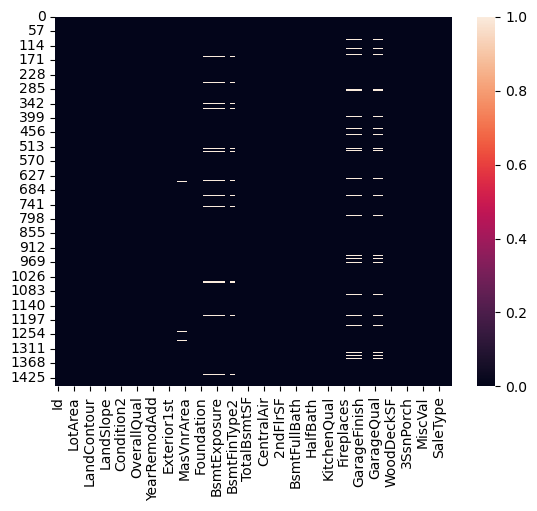

In [13]:
sns.heatmap(train_df.isna())

In [14]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

<AxesSubplot:xlabel='MSSubClass', ylabel='Density'>

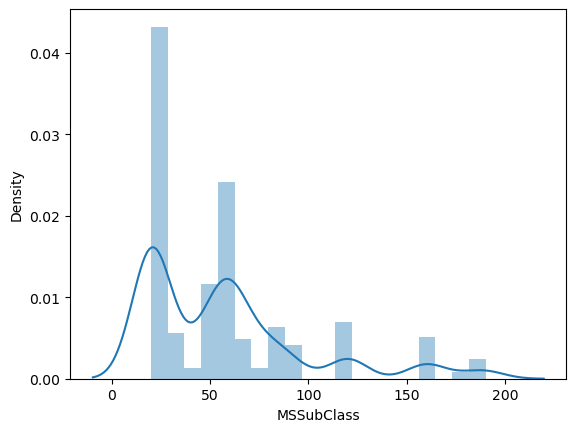

In [15]:
sns.distplot(train_df['MSSubClass'])

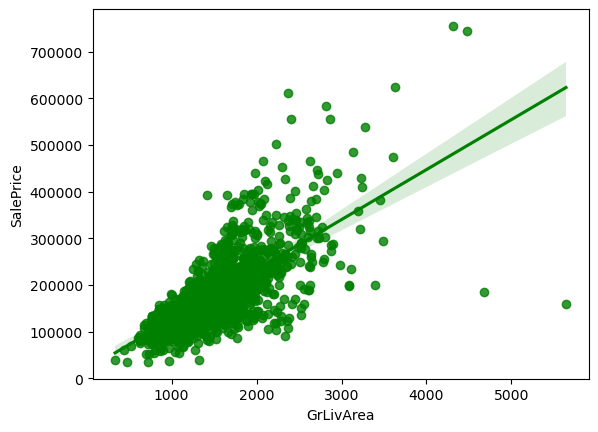

In [16]:
sns.regplot(x = 'GrLivArea', y = 'SalePrice', color = 'green', data = train)
plt.show()


In [17]:
train_df.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [18]:
num_var=['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']

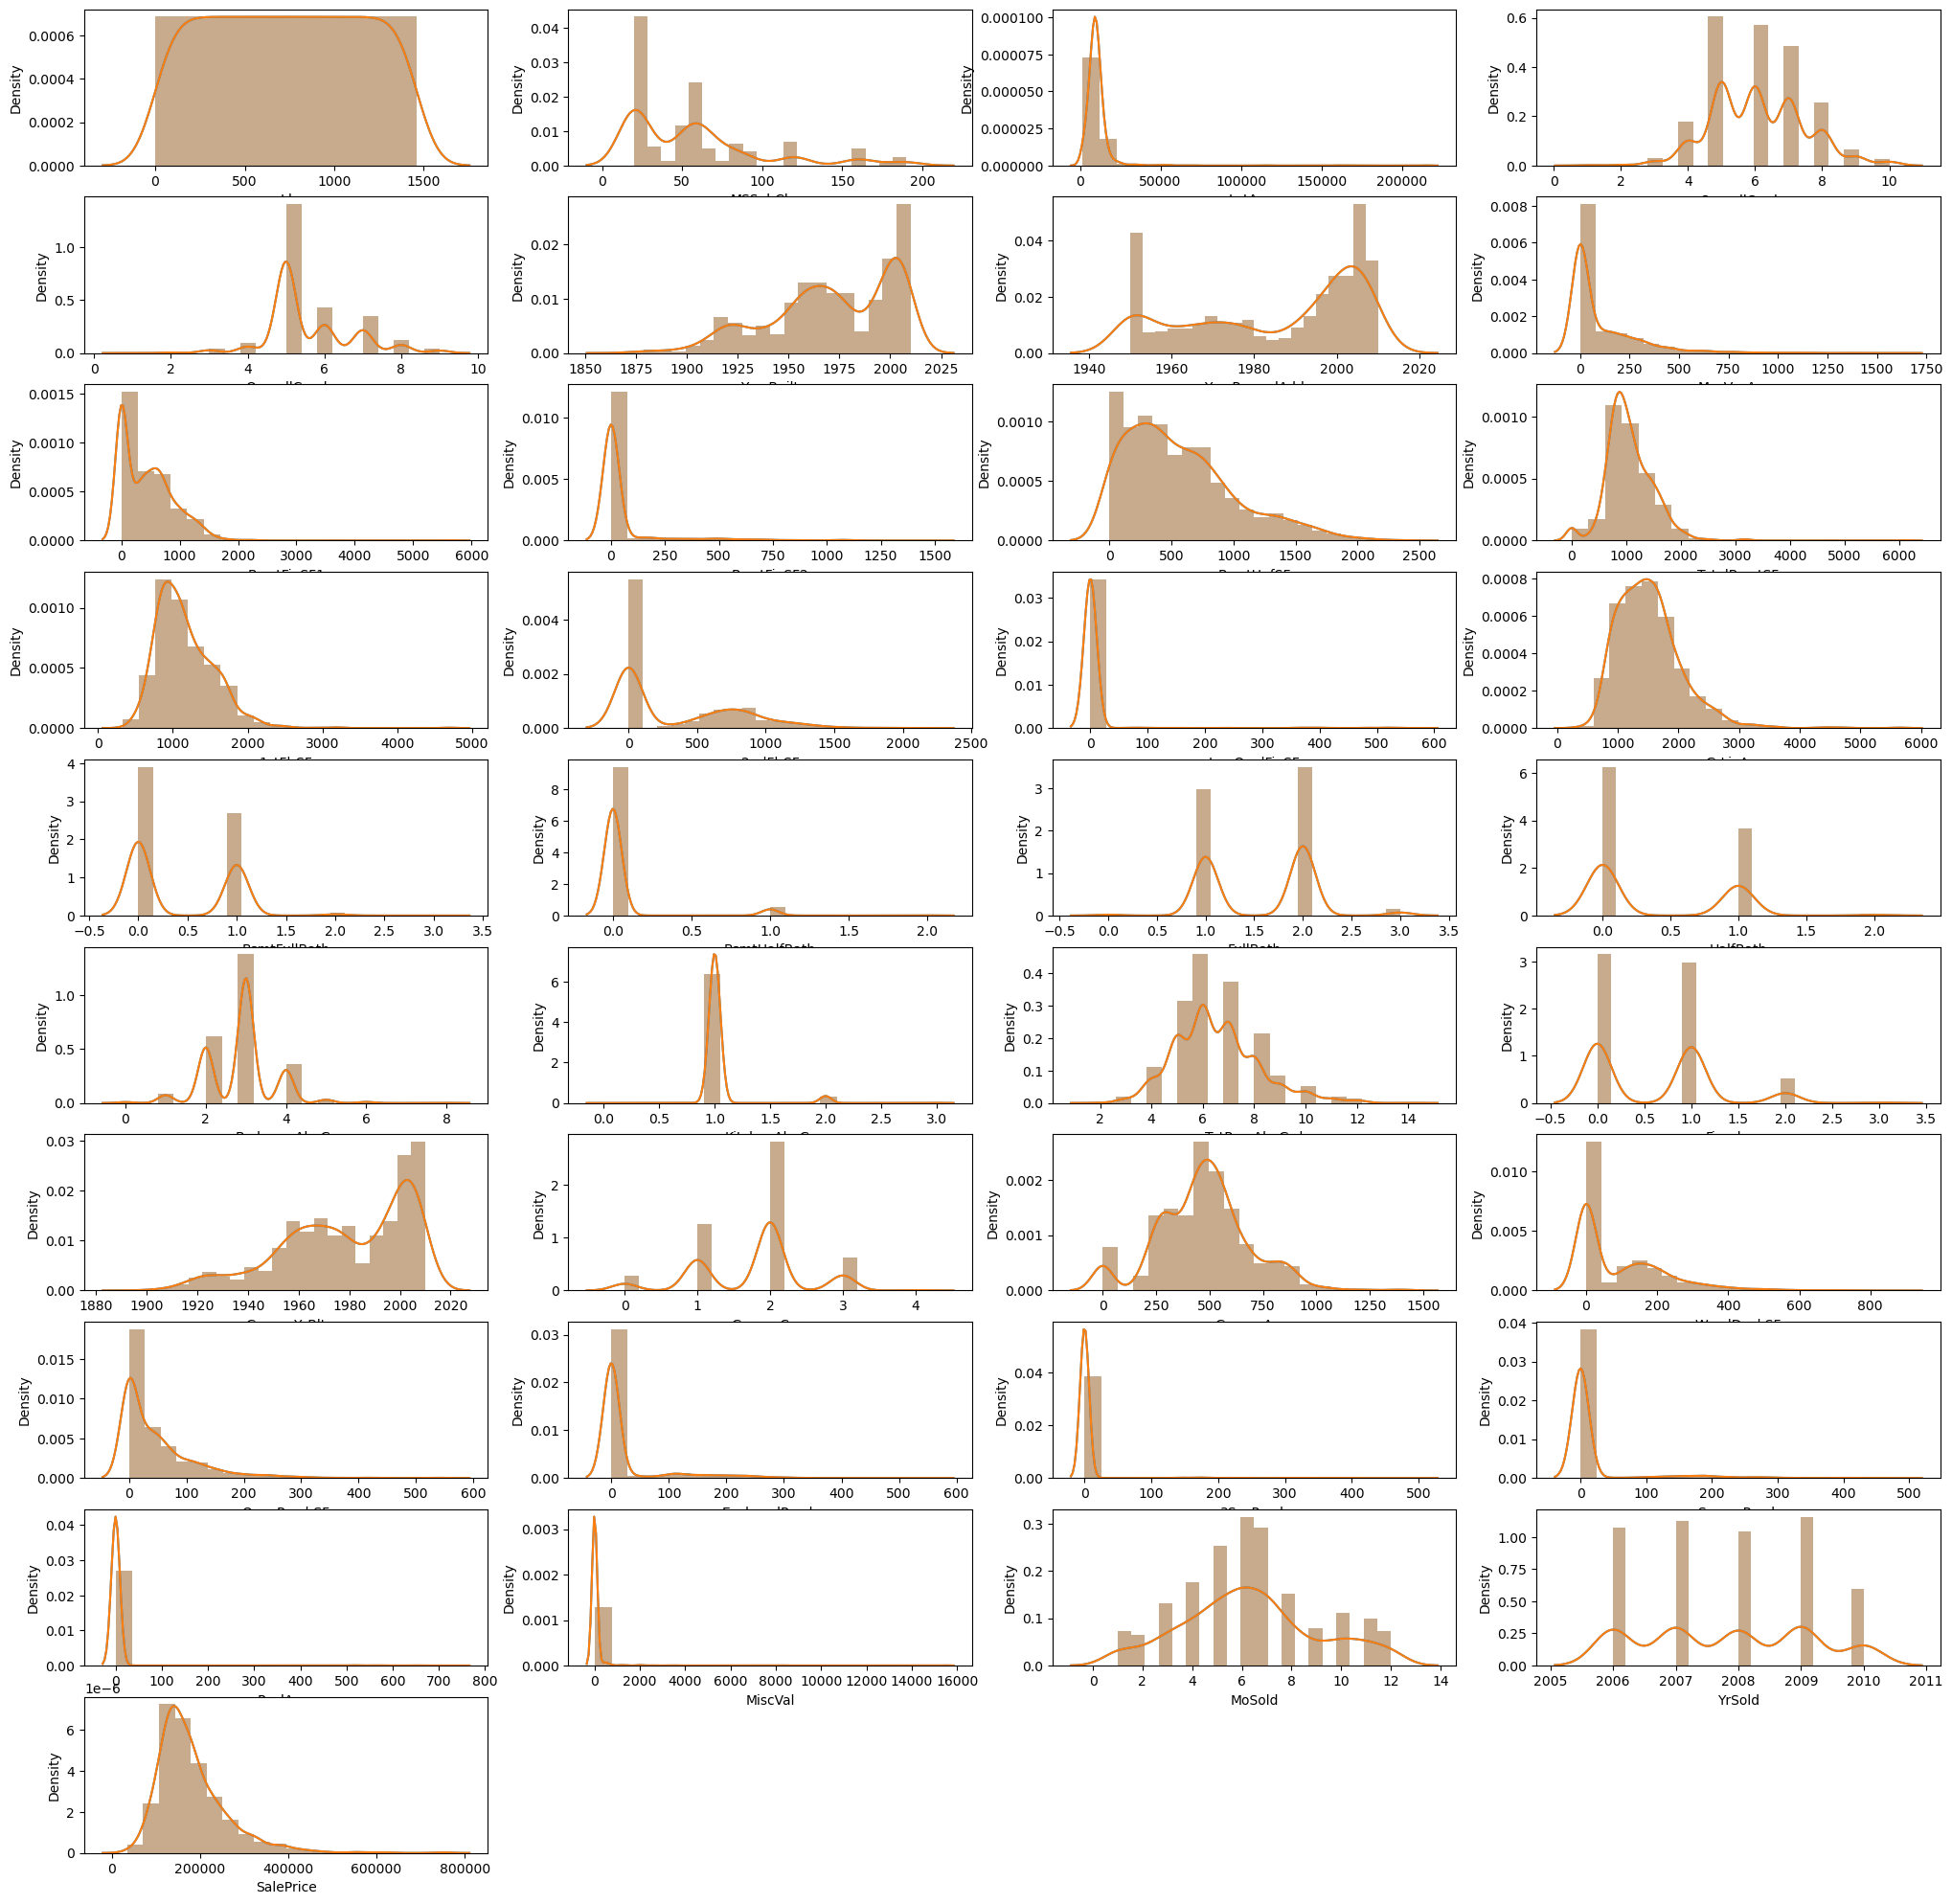

In [19]:
plt.figure(figsize=(25,25))
for i,var in enumerate(num_var):
  plt.subplot(10,4,i+1)
  sns.distplot(train[var],bins=20)
  sns.distplot(train_df[var],bins=20)
plt.show()

In [20]:
cat_var=train_df.select_dtypes(include=['O']).columns

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
imputer=SimpleImputer(strategy='mean')
imputer.fit(train_df[num_var])

SimpleImputer()

In [23]:
imputer.statistics_

array([7.30500000e+02, 5.68972603e+01, 1.05168281e+04, 6.09931507e+00,
       5.57534247e+00, 1.97126781e+03, 1.98486575e+03, 1.03685262e+02,
       4.43639726e+02, 4.65493151e+01, 5.67240411e+02, 1.05742945e+03,
       1.16262671e+03, 3.46992466e+02, 5.84452055e+00, 1.51546370e+03,
       4.25342466e-01, 5.75342466e-02, 1.56506849e+00, 3.82876712e-01,
       2.86643836e+00, 1.04657534e+00, 6.51780822e+00, 6.13013699e-01,
       1.97850616e+03, 1.76712329e+00, 4.72980137e+02, 9.42445205e+01,
       4.66602740e+01, 2.19541096e+01, 3.40958904e+00, 1.50609589e+01,
       2.75890411e+00, 4.34890411e+01, 6.32191781e+00, 2.00781575e+03,
       1.80921196e+05])

In [24]:
imputer.fit_transform(train_df[num_var])

array([[1.00000e+00, 6.00000e+01, 8.45000e+03, ..., 2.00000e+00,
        2.00800e+03, 2.08500e+05],
       [2.00000e+00, 2.00000e+01, 9.60000e+03, ..., 5.00000e+00,
        2.00700e+03, 1.81500e+05],
       [3.00000e+00, 6.00000e+01, 1.12500e+04, ..., 9.00000e+00,
        2.00800e+03, 2.23500e+05],
       ...,
       [1.45800e+03, 7.00000e+01, 9.04200e+03, ..., 5.00000e+00,
        2.01000e+03, 2.66500e+05],
       [1.45900e+03, 2.00000e+01, 9.71700e+03, ..., 4.00000e+00,
        2.01000e+03, 1.42125e+05],
       [1.46000e+03, 2.00000e+01, 9.93700e+03, ..., 6.00000e+00,
        2.00800e+03, 1.47500e+05]])

In [25]:
train_df[num_var]=imputer.transform(train_df[num_var])


In [26]:
train_df[num_var].isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [27]:
cat_imputer=SimpleImputer(strategy='most_frequent')
train_df[cat_var]=cat_imputer.fit_transform(train_df[cat_var])

In [28]:
train_df[cat_var].isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [29]:
 from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [30]:
for var in cat_var:
    train_df[var]=le.fit_transform(train_df[var])

In [31]:
train_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

<AxesSubplot:>

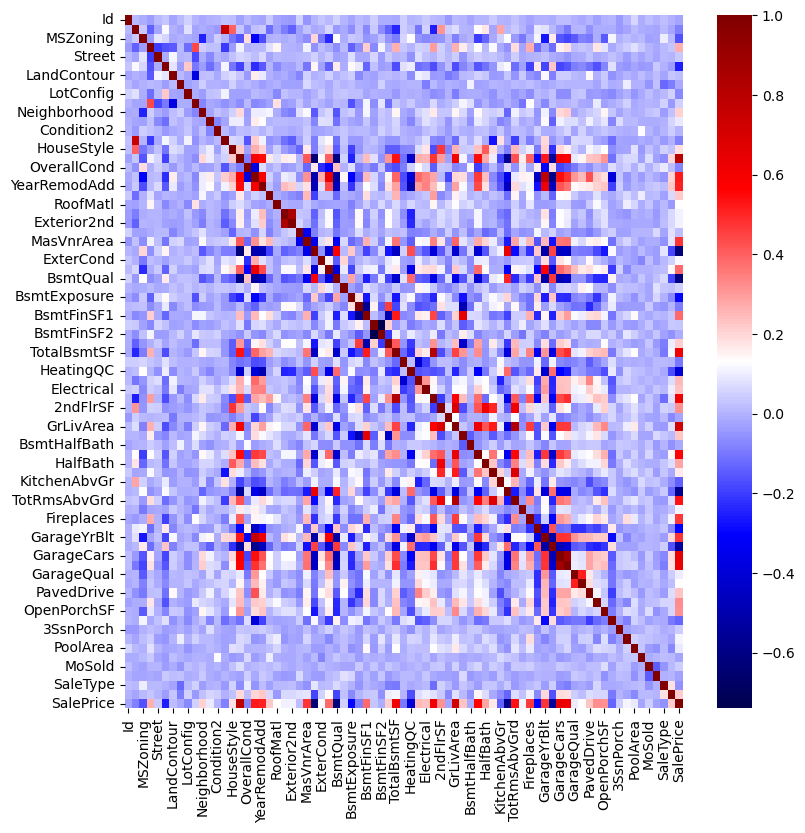

In [32]:
plt.figure(figsize=(9,9))
sns.heatmap(train_df.corr(),cmap="seismic")

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   int64  
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

In [34]:
x=train_df.iloc[:,:-1]
x.shape

(1460, 74)

In [35]:
y=train_df['SalePrice']
y.shape

(1460,)

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.1,random_state=42)


In [37]:
rgr=LinearRegression()
rgr.fit(xtrain,ytrain)
rgr.score(xtest,ytest)

0.8542280617231335

In [38]:
import xgboost as xgb
import catboost as cat
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [39]:
gbk = LinearRegression()
gbk.fit(xtrain, ytrain)
gbk.score(xtest,ytest)

0.8542280617231335

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

gbk = GradientBoostingRegressor()
gbk.fit(xtrain, ytrain)
gbk.score(xtest,ytest)

0.92150410049536

In [41]:
model = BaggingRegressor(base_estimator = DecisionTreeRegressor(),
                          n_estimators = 1000,
                          random_state = 42 )
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9045144495233499

In [42]:
xgb_model = xgb.XGBRegressor(
   learning_rate=0.02,
                       n_estimators=2000,
                       max_depth=11,
                       min_child_weight=0,
                       gamma=0.7,
                       subsample=1,
                       max_leaves =99,
                       colsample_bytree=0.7,
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       random_state=42)
xgb_model.fit(xtrain,ytrain)
xgb_model.score(xtest,ytest)

0.9172809965813501

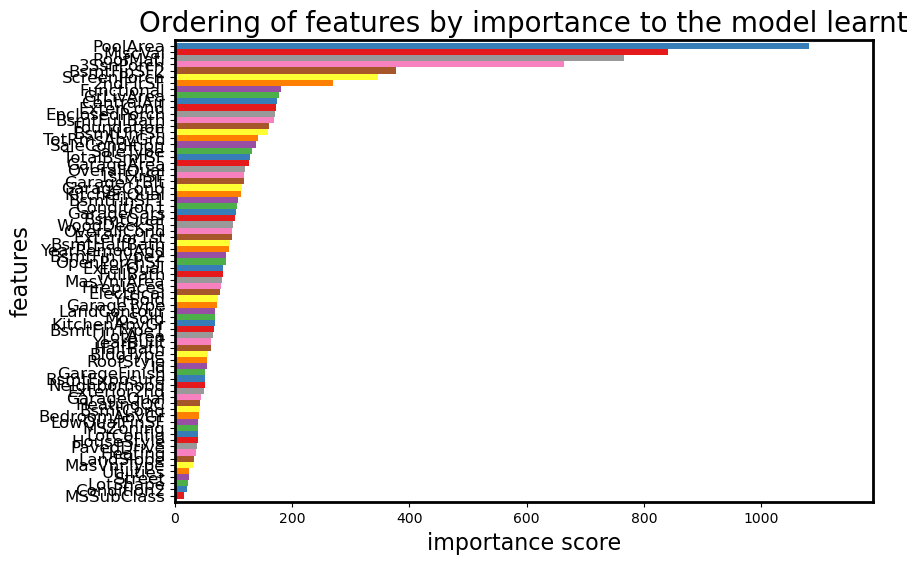

In [43]:
from xgboost import plot_importance
fig = plt.figure(figsize = (9, 6))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(xgb_model, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

In [44]:
cat_model = cat.CatBoostRegressor(
  iterations=350,
        loss_function="MAPE",
        verbose=0,
        grow_policy='SymmetricTree',
        learning_rate=0.05,
        colsample_bylevel=0.8,
        max_depth=11,
        l2_leaf_reg=0.2,
        subsample=.9,
        max_bin=4096,)
cat_model.fit(xtrain,ytrain)
cat_model.score(xtest,ytest)

0.610187109662546

In [45]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(objective='regression', 
                       num_leaves=9,
                       learning_rate=0.3, 
                       n_estimators=6000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.7,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)
lgbm.fit(xtrain,ytrain)
lgbm.score(xtest,ytest)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


0.8762975209840766